In [1]:
import pandas as pd
import os
from datetime import datetime, timedelta
import numpy as np
import pickle
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#session_with_holiday: session + 'Rest' variable
days = pd.read_csv('C:\\Users\\승우\\Desktop\\session_with_holiday.csv', engine='python')
product = pd.read_csv('C:\\DynamicData\\product.csv', encoding='utf-8')

C:\Users\anaconda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Session에 머물지 않고 바로 나가는 사람들 (다른 EDA 코드 부분 포함)

In [3]:
#Session 머물지도 않고 바로 나가는 CLIENT들 있다.
days.loc[days['TOT_SESS_HR_V'].isna(),:]

,Unnamed: 0,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,Rest
38,38,5878756,7465325,5,2018-05-29,1.0,NaN,mobile,Chungcheongnam-do,Cheonan-si,0
64,64,6065738,9564520,26,2018-04-24,1.0,NaN,mobile,Gyeonggi-do,Gwangmyeong-si,0
65,65,6065738,9564529,25,2018-04-24,1.0,NaN,mobile,Gyeonggi-do,Gwangmyeong-si,0
246,246,6003295,1035552,2,2018-09-13,1.0,NaN,desktop,Daejeon,Daejeon,0
604,604,5946142,9600252,4,2018-04-23,1.0,NaN,mobile,Seoul,Seoul,0
1435,1435,6163287,5612765,98,2018-06-28,1.0,NaN,mobile,Seoul,Seoul,0
2006,2006,5958856,9540083,20,2018-04-24,1.0,NaN,mobile,Seoul,Seoul,0
2190,2190,5970505,6643638,3,2018-06-11,1.0,NaN,desktop,Seoul,Seoul,0
2216,2216,5966034,9201368,8,2018-04-30,1.0,NaN,mobile,Seoul,Seoul,0
2745,2745,6527707,8400072,29,2018-05-13,1.0,NaN,mobile,Gyeonggi-do,Gwangju-si,1


In [4]:
#확인
days.iloc[38,]
#이런 사람들은 보면 실제로도 TOT_PAG_VIEW_CT가 1이거나 결측값(NaN)

Unnamed: 0                        38
CLNT_ID                      5878756
SESS_ID                      7465325
SESS_SEQ                           5
SESS_DT                   2018-05-29
TOT_PAG_VIEW_CT                    1
TOT_SESS_HR_V                    NaN
DVC_CTG_NM                    mobile
ZON_NM             Chungcheongnam-do
CITY_NM                   Cheonan-si
Rest                               0
Name: 38, dtype: object

In [5]:
#추후에 이 이용자들의 행동 양태를 보기 위해 머물지도 않고 바로 나가는 CLIENT들을 따로 저장 (With Session ID)
Zero_Sess_HR_CLNT_ID = days.loc[days['TOT_SESS_HR_V'].isna(),:]['CLNT_ID']
Zero_Sess_HR_SESS_ID = days.loc[days['TOT_SESS_HR_V'].isna(),:]['SESS_ID']
#이 CLIENT들을 제거할 것인가를 결정한 후에 int64형으로 데이터를 바꾸어줄 것
#예를 들어, 빈 칸에 0을 넣을 것인가, 아니면 이 CLIENT들에 해당하는 observation을 제거할 것인가를 결정

### Days Manipulation

In [6]:
days = days.drop(days.columns[0], axis=1) #첫번째 column에 index 값들이 존재

In [8]:
all_time = days.loc[:,'SESS_DT'].astype('str')
days['datetime'] = list(map(lambda x:datetime.strptime(x,'%Y-%m-%d'), all_time))
del all_time

In [10]:
holidays_list = days.loc[days.loc[:,'Rest']==1,:].loc[:,'SESS_DT'].astype('str')
holidays_list = list(map(lambda x:datetime.strptime(x,'%Y-%m-%d'), holidays_list))

### merge

In [12]:
holidays_essential_vari = days.loc[:, ['CLNT_ID', 'SESS_ID', 'datetime']] 
product_essential_vari = product.loc[:,['CLNT_ID', 'SESS_ID', 'PD_BUY_AM', 'PD_BUY_CT']]

In [13]:
merging = pd.merge(holidays_essential_vari, product_essential_vari, on=['CLNT_ID', 'SESS_ID'], how='left')

### 주말 이 외의, 국가 지정 공휴일 따로 labeling 해주기. 

In [16]:
#일반적인 주말과, 국가 지정 공휴일 간에는 또 구매 패턴이 다르지 않을까 하는 생각. 
gov_holiday = np.array(['20180505', '20180522', '20180606', '20180815', '20180923', '20180924', '20180925'])
gov_repic_day = np.array(['20180507', '20180613', '20180926']) #5월7일, 9월26일: 대체 공휴일,6월 13일: 지방선거일
gov_repic_choose = gov_repic_day[1]
gov_whole_holiday = np.concatenate((gov_holiday, gov_repic_day)) 
gov_holiday = np.append(gov_holiday, gov_repic_choose) #대체 공휴일은 그 앞의 휴일로 대체 가능 -> 지방선거일만 의미가 있다.
gov_holiday = list(map(lambda x:datetime.strptime(x,'%Y%m%d'), gov_holiday))

In [18]:
gov_holiday.sort()

### Idea 수정

In [70]:
#수정 -> 생각해보니, 토요일은 일요일 다음인데, 토요일, 일요일을 휴일로 한 데 묶어서 하루전, 이틀전 etc 의 패턴을 봐버리면 겹치는 경우가 생김
#토요일만을 기준으로 그 수를 세야겠다는 생각이 듦 & 토요일, 국가지정공휴일 경향성을 따로봐야겠다는 생각. 

In [21]:
Sat = pd.date_range(min(days.SESS_DT), max(days.SESS_DT), freq='W-SAT') #Saturday
Sat = np.asarray(Sat).astype('str')
Sat = list(map(lambda x:x[0:10], Sat))
Sat = list(map(lambda x:datetime.strptime(x,'%Y-%m-%d'), Sat))
Sat = Sat[0:4] + Sat[5:-2]

#어린이 날은 일반적인 토요일로 볼 수 없으므로 제외.
#마지막주, 마지막 주의 전주: 추석과 관련되어 있으므로 경향성을 보기 위한 EDA에서는 제외 (그 때 폭발적으로 주문량이 증가하기 때문에, 본질을 흐릴 수 있다.)

In [23]:
Sat
Sat_minus1 = list(map(lambda x: x+timedelta(days=-1), Sat))
Sat_minus2 = list(map(lambda x: x+timedelta(days=-2), Sat))
Sat_minus3 = list(map(lambda x: x+timedelta(days=-3), Sat))
Sat_minus4 = list(map(lambda x: x+timedelta(days=-4), Sat))
Sat_minus5 = list(map(lambda x: x+timedelta(days=-5), Sat))
Sat_minus6 = list(map(lambda x: x+timedelta(days=-6), Sat)) #Sunday Purchase

In [24]:
Sat_that_day = merging.ix[merging.loc[:,'datetime'].isin(Sat)]
Sat_minus1_data = merging.ix[merging.loc[:,'datetime'].isin(Sat_minus1)]
Sat_minus2_data = merging.ix[merging.loc[:,'datetime'].isin(Sat_minus2)]
Sat_minus3_data = merging.ix[merging.loc[:,'datetime'].isin(Sat_minus3)]
Sat_minus4_data = merging.ix[merging.loc[:,'datetime'].isin(Sat_minus4)]
Sat_minus5_data = merging.ix[merging.loc[:,'datetime'].isin(Sat_minus5)]
Sat_minus6_data = merging.ix[merging.loc[:,'datetime'].isin(Sat_minus6)]

C:\Users\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can 

In [25]:
print(len(merging))
print()
print(Sat_that_day.count()) 
print('토요일 구매 개별 사용자 수: {:d}' .format(len(Sat_that_day.loc[:,'CLNT_ID'].unique())))
print()
print(Sat_minus1_data.count()) 
print('금요일 구매 개별 사용자 수: {:d}' .format(len(Sat_minus1_data.loc[:,'CLNT_ID'].unique())))
print()
print(Sat_minus2_data.count()) 
print('목요일 구매 개별 사용자 수: {:d}' .format(len(Sat_minus2_data.loc[:,'CLNT_ID'].unique())))
print()
print(Sat_minus3_data.count()) 
print('수요일 구매 개별 사용자 수: {:d}' .format(len(Sat_minus3_data.loc[:,'CLNT_ID'].unique())))
print()
print(Sat_minus4_data.count())  
print('화요일 구매 개별 사용자 수: {:d}' .format(len(Sat_minus4_data.loc[:,'CLNT_ID'].unique())))
print()
print(Sat_minus5_data.count())
print('월요일 구매 개별 사용자 수: {:d}' .format(len(Sat_minus5_data.loc[:,'CLNT_ID'].unique())))
print()
print(Sat_minus6_data.count()) 
print('일요일 구매 개별 사용자 수: {:d}' .format(len(Sat_minus6_data.loc[:,'CLNT_ID'].unique())))

#월요일의 구매 건수가 압도적으로 많음. 

5024906

CLNT_ID      525898
SESS_ID      525898
datetime     525898
PD_BUY_AM    525898
PD_BUY_CT    525898
dtype: int64
토요일 구매 개별 사용자 수: 197304

CLNT_ID      562808
SESS_ID      562808
datetime     562808
PD_BUY_AM    562808
PD_BUY_CT    562808
dtype: int64
금요일 구매 개별 사용자 수: 214649

CLNT_ID      632533
SESS_ID      632533
datetime     632533
PD_BUY_AM    632533
PD_BUY_CT    632533
dtype: int64
목요일 구매 개별 사용자 수: 236395

CLNT_ID      665858
SESS_ID      665858
datetime     665858
PD_BUY_AM    665858
PD_BUY_CT    665858
dtype: int64
수요일 구매 개별 사용자 수: 247887

CLNT_ID      674328
SESS_ID      674328
datetime     674328
PD_BUY_AM    674328
PD_BUY_CT    674328
dtype: int64
화요일 구매 개별 사용자 수: 248199

CLNT_ID      783059
SESS_ID      783059
datetime     783059
PD_BUY_AM    783059
PD_BUY_CT    783059
dtype: int64
월요일 구매 개별 사용자 수: 275952

CLNT_ID      652031
SESS_ID      652031
datetime     652031
PD_BUY_AM    652031
PD_BUY_CT    652031
dtype: int64
일요일 구매 개별 사용자 수: 231609


In [26]:
#토요일들의 평균
print(Sat_that_day.count()/len(Sat))
print(Sat_minus1_data.count()/len(Sat))
print(Sat_minus2_data.count()/len(Sat))
print(Sat_minus3_data.count()/len(Sat))
print(Sat_minus4_data.count()/len(Sat))
print(Sat_minus5_data.count()/len(Sat))
print(Sat_minus6_data.count()/len(Sat))

CLNT_ID      22865.130435
SESS_ID      22865.130435
datetime     22865.130435
PD_BUY_AM    22865.130435
PD_BUY_CT    22865.130435
dtype: float64
CLNT_ID      24469.913043
SESS_ID      24469.913043
datetime     24469.913043
PD_BUY_AM    24469.913043
PD_BUY_CT    24469.913043
dtype: float64
CLNT_ID      27501.434783
SESS_ID      27501.434783
datetime     27501.434783
PD_BUY_AM    27501.434783
PD_BUY_CT    27501.434783
dtype: float64
CLNT_ID      28950.347826
SESS_ID      28950.347826
datetime     28950.347826
PD_BUY_AM    28950.347826
PD_BUY_CT    28950.347826
dtype: float64
CLNT_ID      29318.608696
SESS_ID      29318.608696
datetime     29318.608696
PD_BUY_AM    29318.608696
PD_BUY_CT    29318.608696
dtype: float64
CLNT_ID      34046.043478
SESS_ID      34046.043478
datetime     34046.043478
PD_BUY_AM    34046.043478
PD_BUY_CT    34046.043478
dtype: float64
CLNT_ID      28349.173913
SESS_ID      28349.173913
datetime     28349.173913
PD_BUY_AM    28349.173913
PD_BUY_CT    28349.173913


In [27]:
days['five_before']=0
days.ix[days['datetime'].isin(Sat_minus5),'five_before']=1

C:\Users\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


### 국가 지정 공휴일 + 대체휴일 들 중 구매 건수가 많아지는 경우가 있는지 확인 

### 임의의 토요일, 어린이날 구매 차이 있나?

In [29]:
def buycount(x):
    
    for i in range(len(x)):
    
        print(x[i])
    

        dday = x[i]
        minus1 = dday + timedelta(days=-1)
        minus2 = dday + timedelta(days=-2)
        minus3 = dday + timedelta(days=-3)
        minus4 = dday + timedelta(days=-4)
        minus5 = dday + timedelta(days=-5)
        minus6 = dday + timedelta(days=-6)

        dday_data = merging.ix[merging.loc[:, 'datetime']==dday]
        minus1_data = merging.ix[merging.loc[:, 'datetime']==minus1]
        minus2_data = merging.ix[merging.loc[:, 'datetime']==minus2]
        minus3_data = merging.ix[merging.loc[:, 'datetime']==minus3]
        minus4_data = merging.ix[merging.loc[:, 'datetime']==minus4]
        minus5_data = merging.ix[merging.loc[:, 'datetime']==minus5]
        minus6_data = merging.ix[merging.loc[:, 'datetime']==minus6]
    
        print(dday_data.count()); print(len(dday_data.loc[:,'CLNT_ID'].unique()))
        print(minus1_data.count()); print(len(minus1_data.loc[:,'CLNT_ID'].unique()))
        print(minus2_data.count()); print(len(minus2_data.loc[:,'CLNT_ID'].unique()))
        print(minus3_data.count()); print(len(minus3_data.loc[:,'CLNT_ID'].unique()))
        print(minus4_data.count()); print(len(minus4_data.loc[:,'CLNT_ID'].unique()))
        print(minus5_data.count()); print(len(minus5_data.loc[:,'CLNT_ID'].unique()))
        print(minus5_data.count()); print(len(minus6_data.loc[:,'CLNT_ID'].unique()))
    
        print('#####################################################################################')
    
        del dday_data, minus1_data, minus2_data, minus3_data, minus4_data, minus5_data, minus6_data

In [30]:
buycount(gov_holiday)

2018-05-05 00:00:00


C:\Users\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
C:\Users\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: Deprec

CLNT_ID      20026
SESS_ID      20026
datetime     20026
PD_BUY_AM    20026
PD_BUY_CT    20026
dtype: int64
10086
CLNT_ID      22570
SESS_ID      22570
datetime     22570
PD_BUY_AM    22570
PD_BUY_CT    22570
dtype: int64
11375
CLNT_ID      29197
SESS_ID      29197
datetime     29197
PD_BUY_AM    29197
PD_BUY_CT    29197
dtype: int64
14248
CLNT_ID      38453
SESS_ID      38453
datetime     38453
PD_BUY_AM    38453
PD_BUY_CT    38453
dtype: int64
17556
CLNT_ID      42988
SESS_ID      42988
datetime     42988
PD_BUY_AM    42988
PD_BUY_CT    42988
dtype: int64
19147
CLNT_ID      34360
SESS_ID      34360
datetime     34360
PD_BUY_AM    34360
PD_BUY_CT    34360
dtype: int64
16657
CLNT_ID      34360
SESS_ID      34360
datetime     34360
PD_BUY_AM    34360
PD_BUY_CT    34360
dtype: int64
13663
#####################################################################################
2018-05-22 00:00:00
CLNT_ID      30654
SESS_ID      30654
datetime     30654
PD_BUY_AM    30654
PD_BUY_CT    30654
d

### 과연 보통의 토요일(위에 있음)과, 국가 공휴일 간의 유의미한 차이가 있는지 확인 해주자. 

### 스승의 날?

In [118]:
teacher = np.array(['2018-05-15'])
teacher = list(map(lambda x:datetime.strptime(x,'%Y-%m-%d'), teacher))

In [119]:
buycount(teacher)

2018-05-15 00:00:00


C:\Users\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
C:\Users\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: Deprec

CLNT_ID      33700
SESS_ID      33700
datetime     33700
PD_BUY_AM    33700
PD_BUY_CT    33700
dtype: int64
16246
CLNT_ID      46562
SESS_ID      46562
datetime     46562
PD_BUY_AM    46562
PD_BUY_CT    46562
dtype: int64
23066
CLNT_ID      33019
SESS_ID      33019
datetime     33019
PD_BUY_AM    33019
PD_BUY_CT    33019
dtype: int64
16148
CLNT_ID      27451
SESS_ID      27451
datetime     27451
PD_BUY_AM    27451
PD_BUY_CT    27451
dtype: int64
13971
CLNT_ID      28506
SESS_ID      28506
datetime     28506
PD_BUY_AM    28506
PD_BUY_CT    28506
dtype: int64
14856
CLNT_ID      31096
SESS_ID      31096
datetime     31096
PD_BUY_AM    31096
PD_BUY_CT    31096
dtype: int64
15405
CLNT_ID      31096
SESS_ID      31096
datetime     31096
PD_BUY_AM    31096
PD_BUY_CT    31096
dtype: int64
17015
#####################################################################################


### Raw Data which is merged by Demian: EDA for NA value replacing

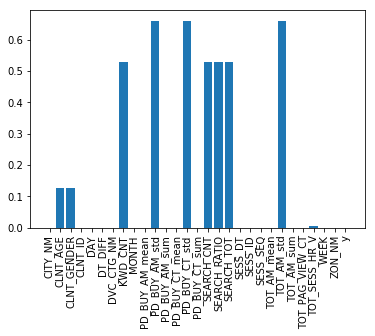

In [2]:
with open('C:\\Users\\승우\\Desktop\\raw\\raw.pickle','rb') as f:
    data = pickle.load(f)

columns = data.columns

tr_fal = []

for i in range(len(columns)):
    
    col = data.loc[:,columns[i]]
    
    if col.isna().any() == True:
        tr_fal.append(True)
    else:
        tr_fal.append(False)

#NaN 값이 존재하는 Column명
columns[tr_fal]

na_percent = []

for i in range(len(columns)):
    na_percent.append(data.loc[:,columns[i]].isna().sum() / len(data.loc[:,columns[i]].isna()))

plt.bar(columns, na_percent)
plt.xticks(rotation=90)
plt.show() 

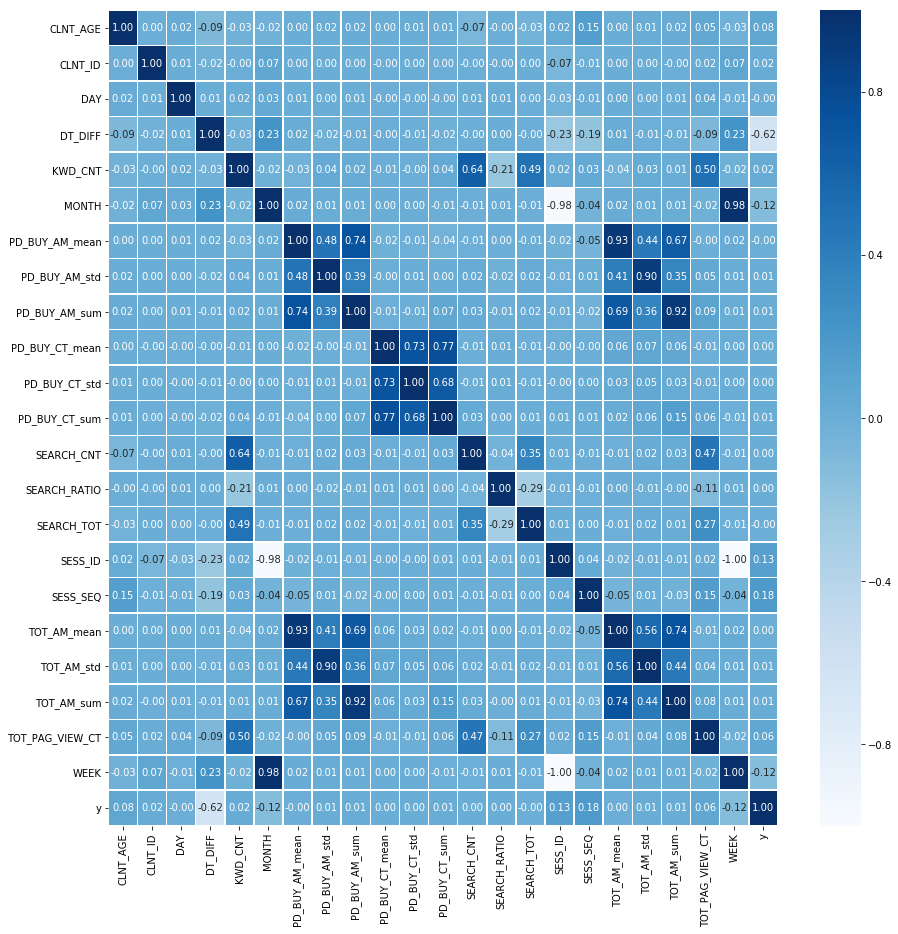

In [3]:
#Can figure out the correlations

plt.figure(figsize=(15, 15))
sns.heatmap(data=data.corr(), annot=True,
           fmt='.2f', linewidths=.5, cmap='Blues')